In [35]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend


In [36]:

# Create a graph (e.g., Erdős-Rényi graph)
# G = nx.erdos_renyi_graph(n=100, p=0.1)

G = nx.read_edgelist('./datasets/BA_EXP/ba_edgelist_exp3_4000_10.edges', comments="%", nodetype=int)


In [37]:
G.number_of_nodes()

4000

In [38]:


# Get the mean degree (k) of the graph
degrees = [deg for _, deg in G.degree()]
mean_degree = np.mean(degrees)

# Calculate B_Threshold
B_Threshold = mean_degree / (mean_degree**2 - mean_degree)

# Range of B values
B_values = np.linspace(1 * B_Threshold, 1.9 * B_Threshold, 10)

# Number of iterations (M)
num_iterations = 100
num_nodes = G.number_of_nodes()

affected_scales = {}


In [39]:
B_values

array([0.11126565, 0.12239221, 0.13351878, 0.14464534, 0.15577191,
       0.16689847, 0.17802503, 0.1891516 , 0.20027816, 0.21140473])

<Figure size 640x480 with 0 Axes>

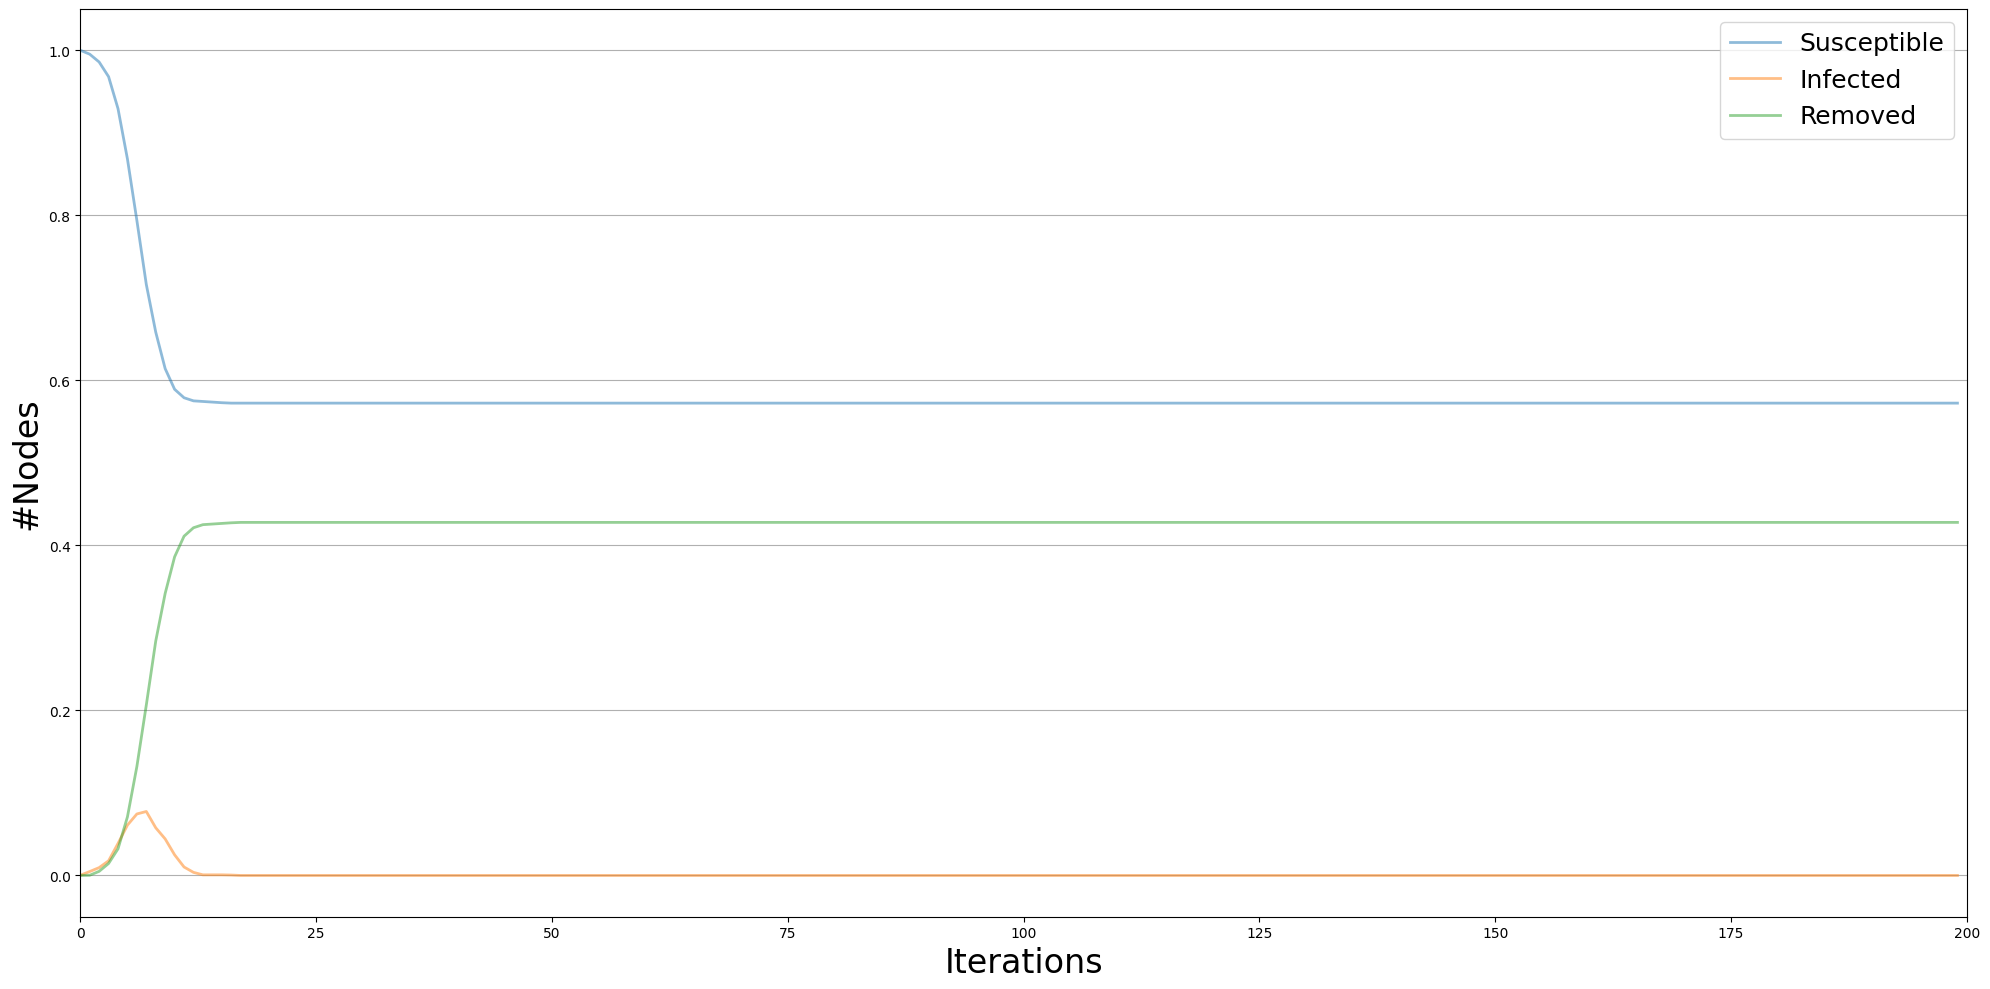

<Figure size 640x480 with 0 Axes>

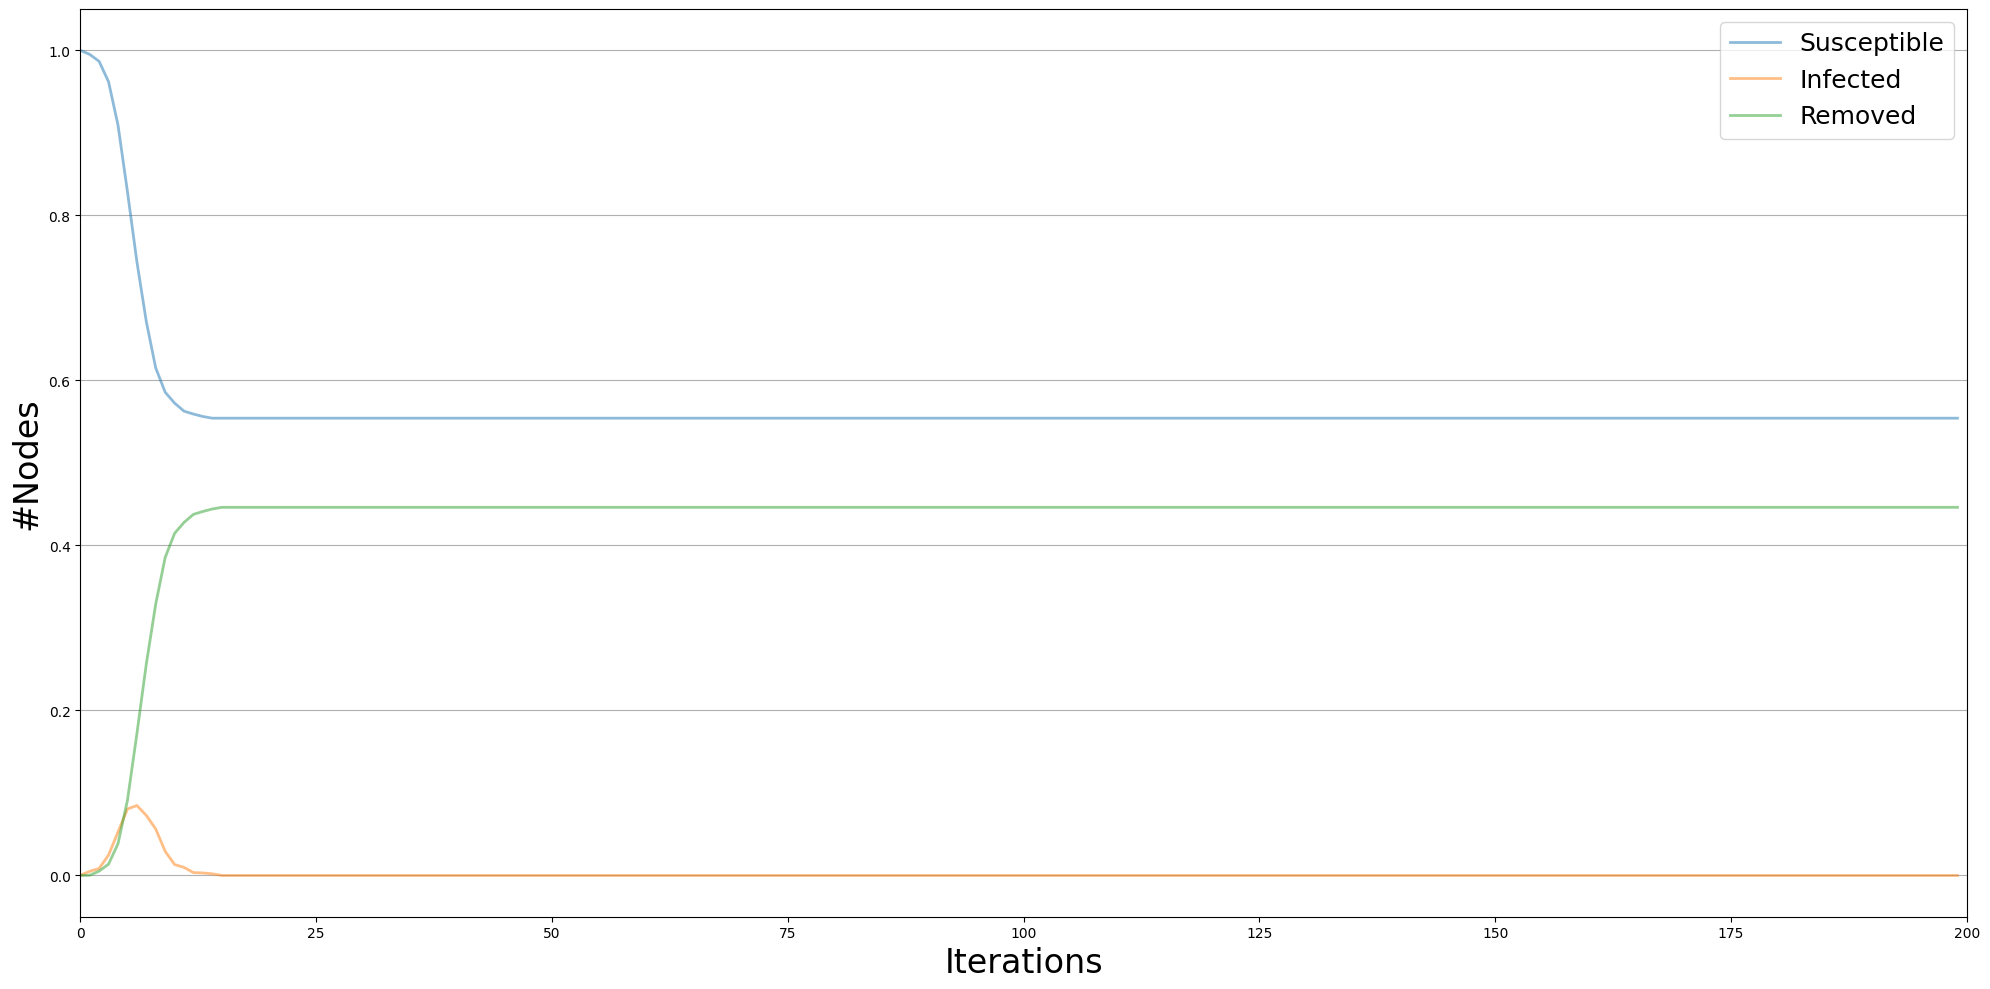

<Figure size 640x480 with 0 Axes>

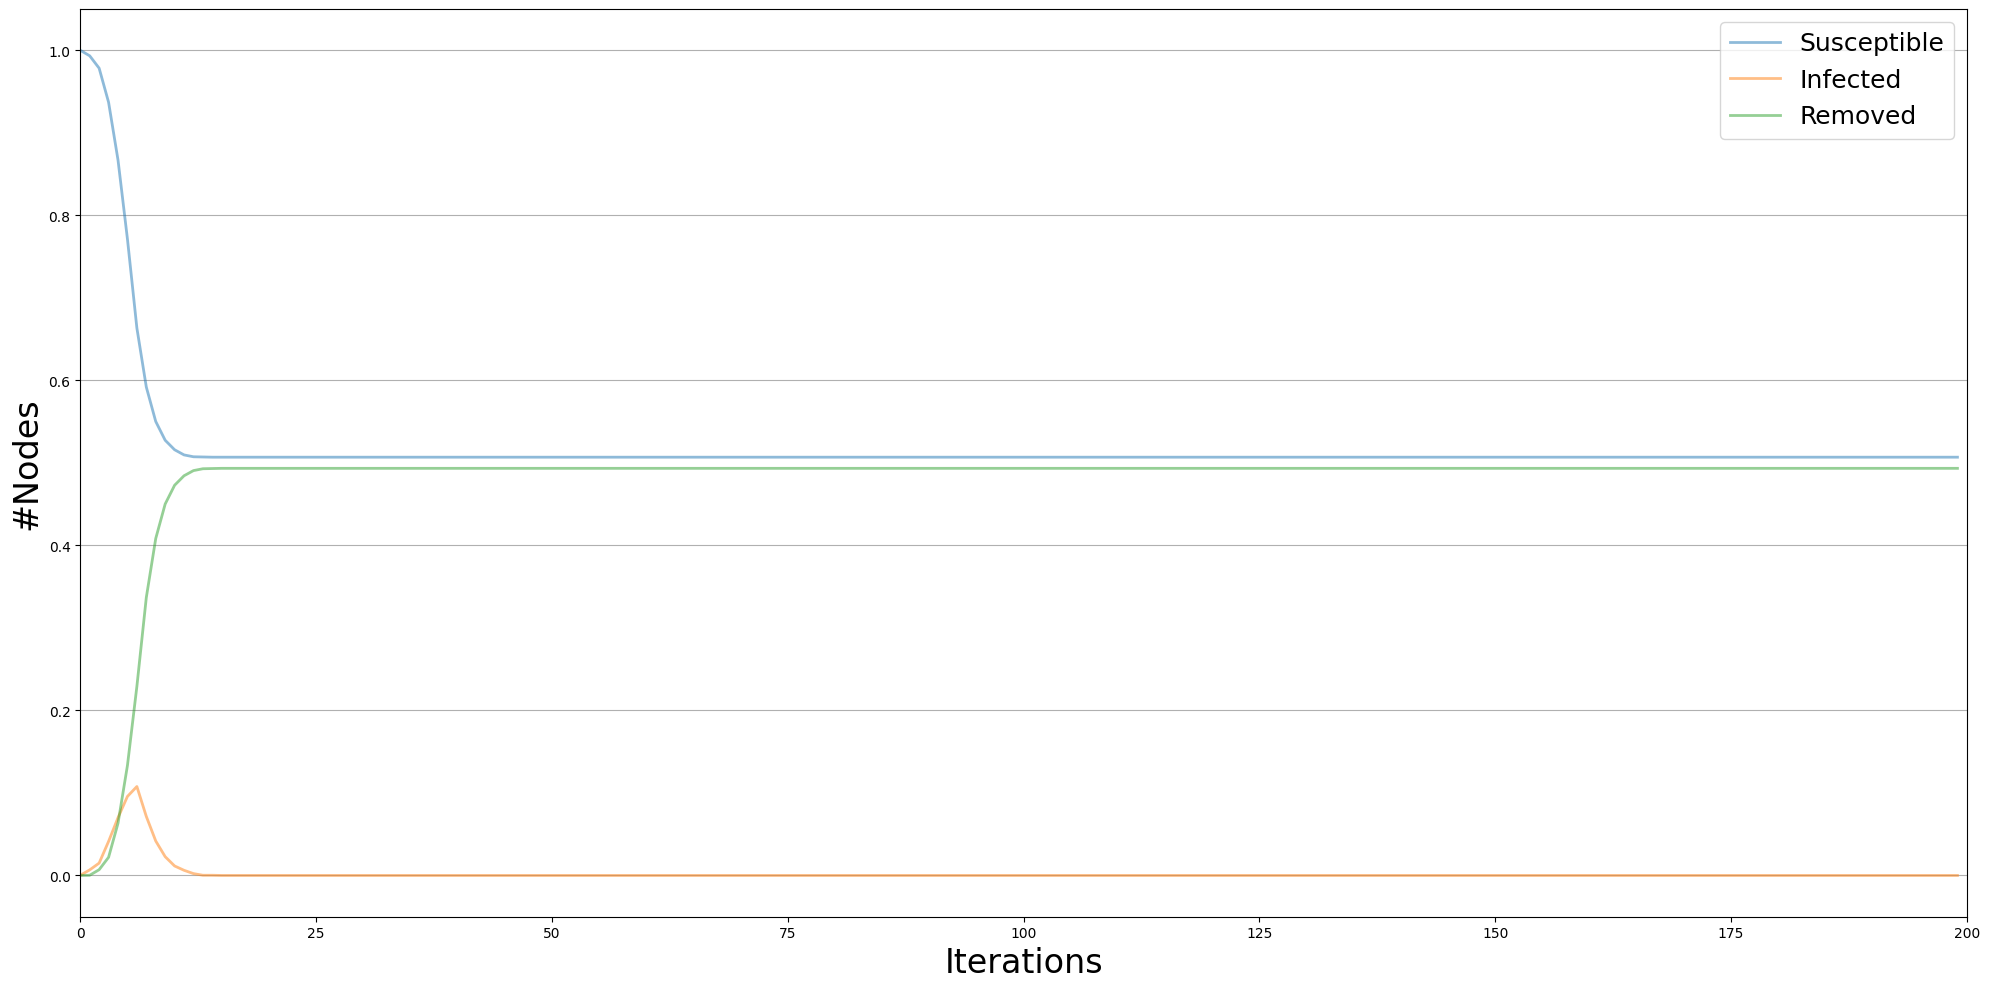

<Figure size 640x480 with 0 Axes>

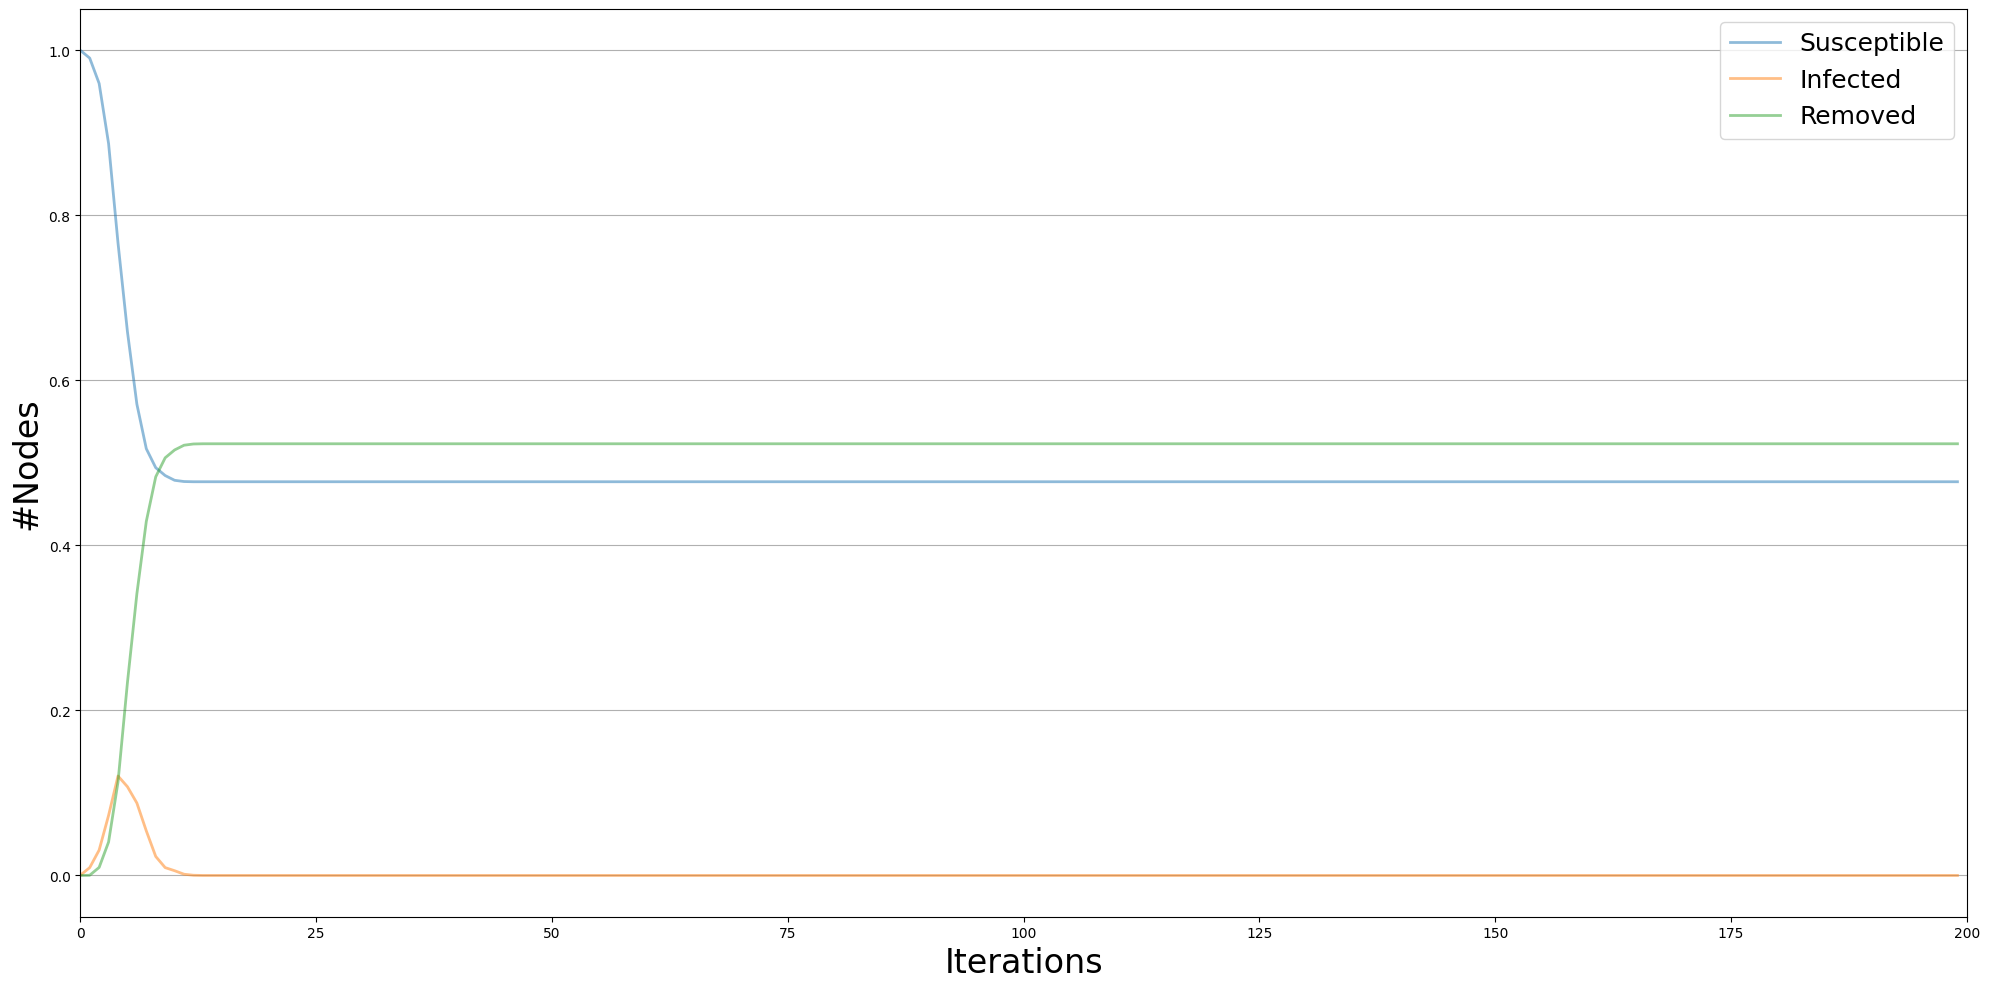

<Figure size 640x480 with 0 Axes>

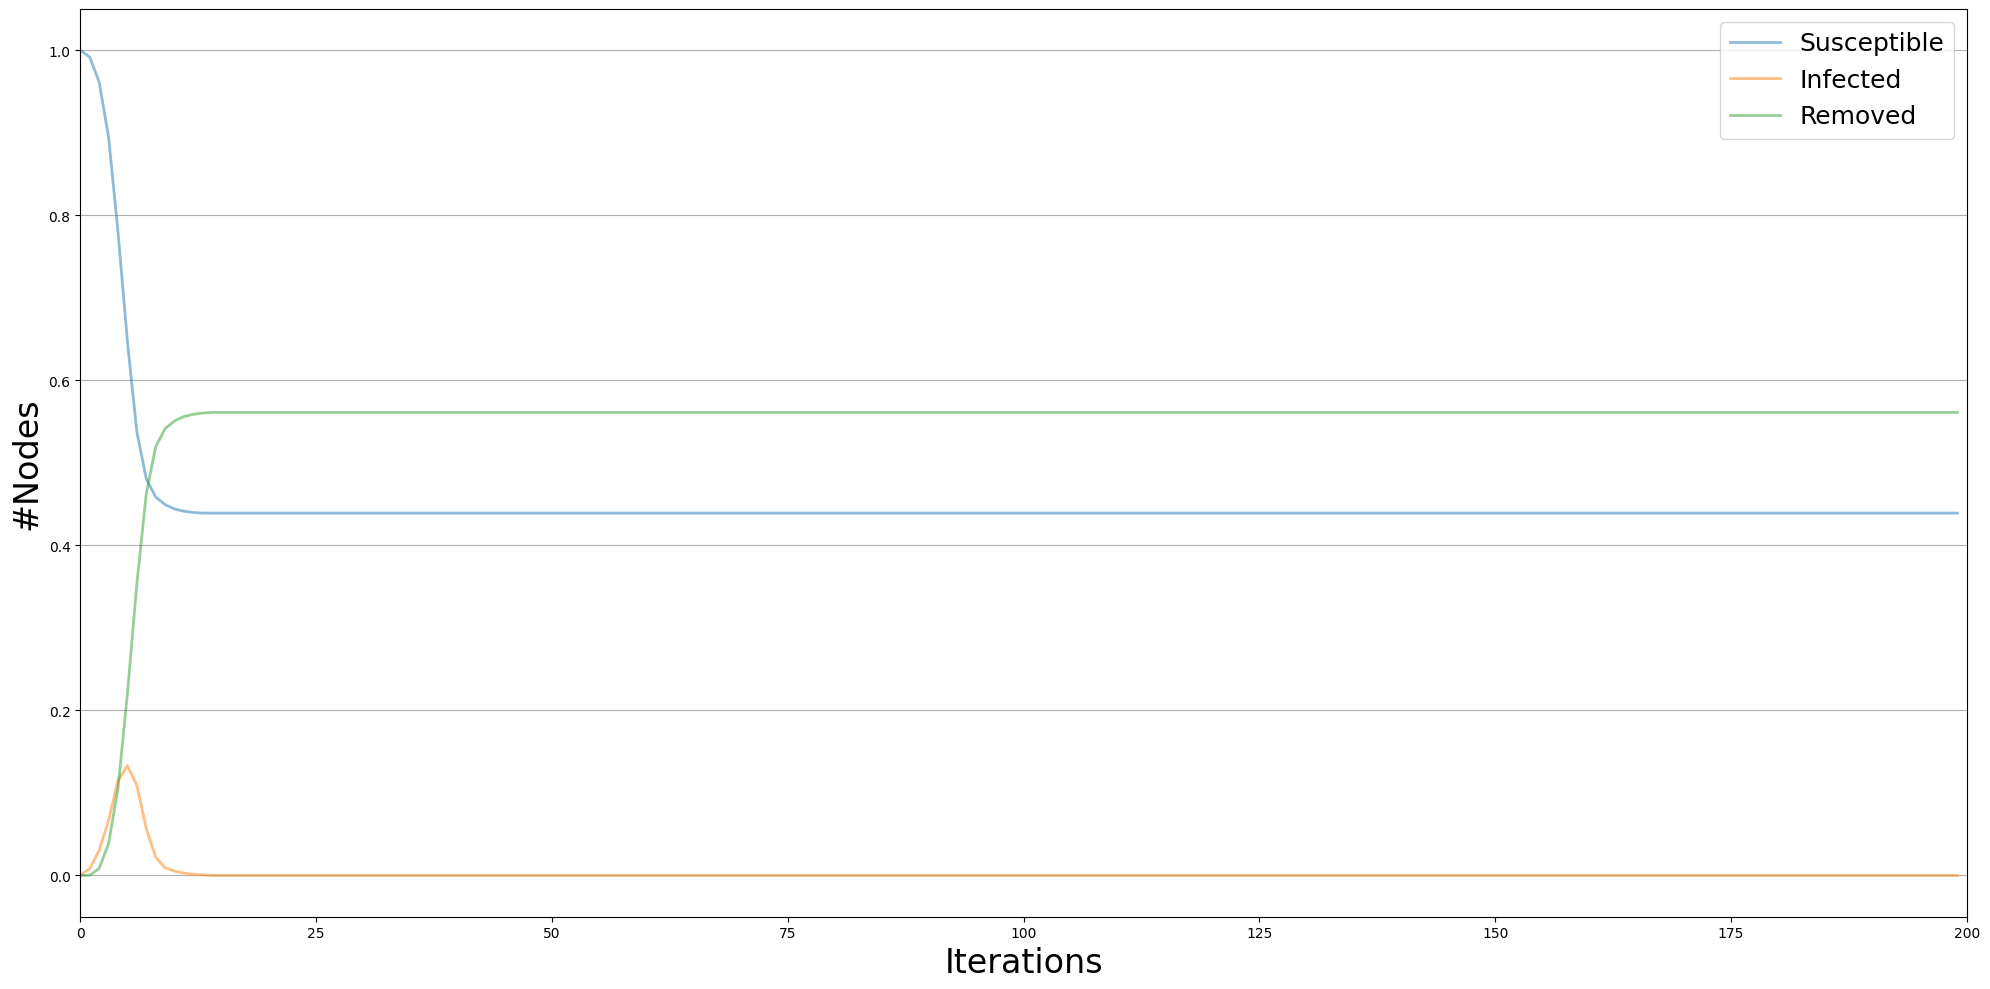

<Figure size 640x480 with 0 Axes>

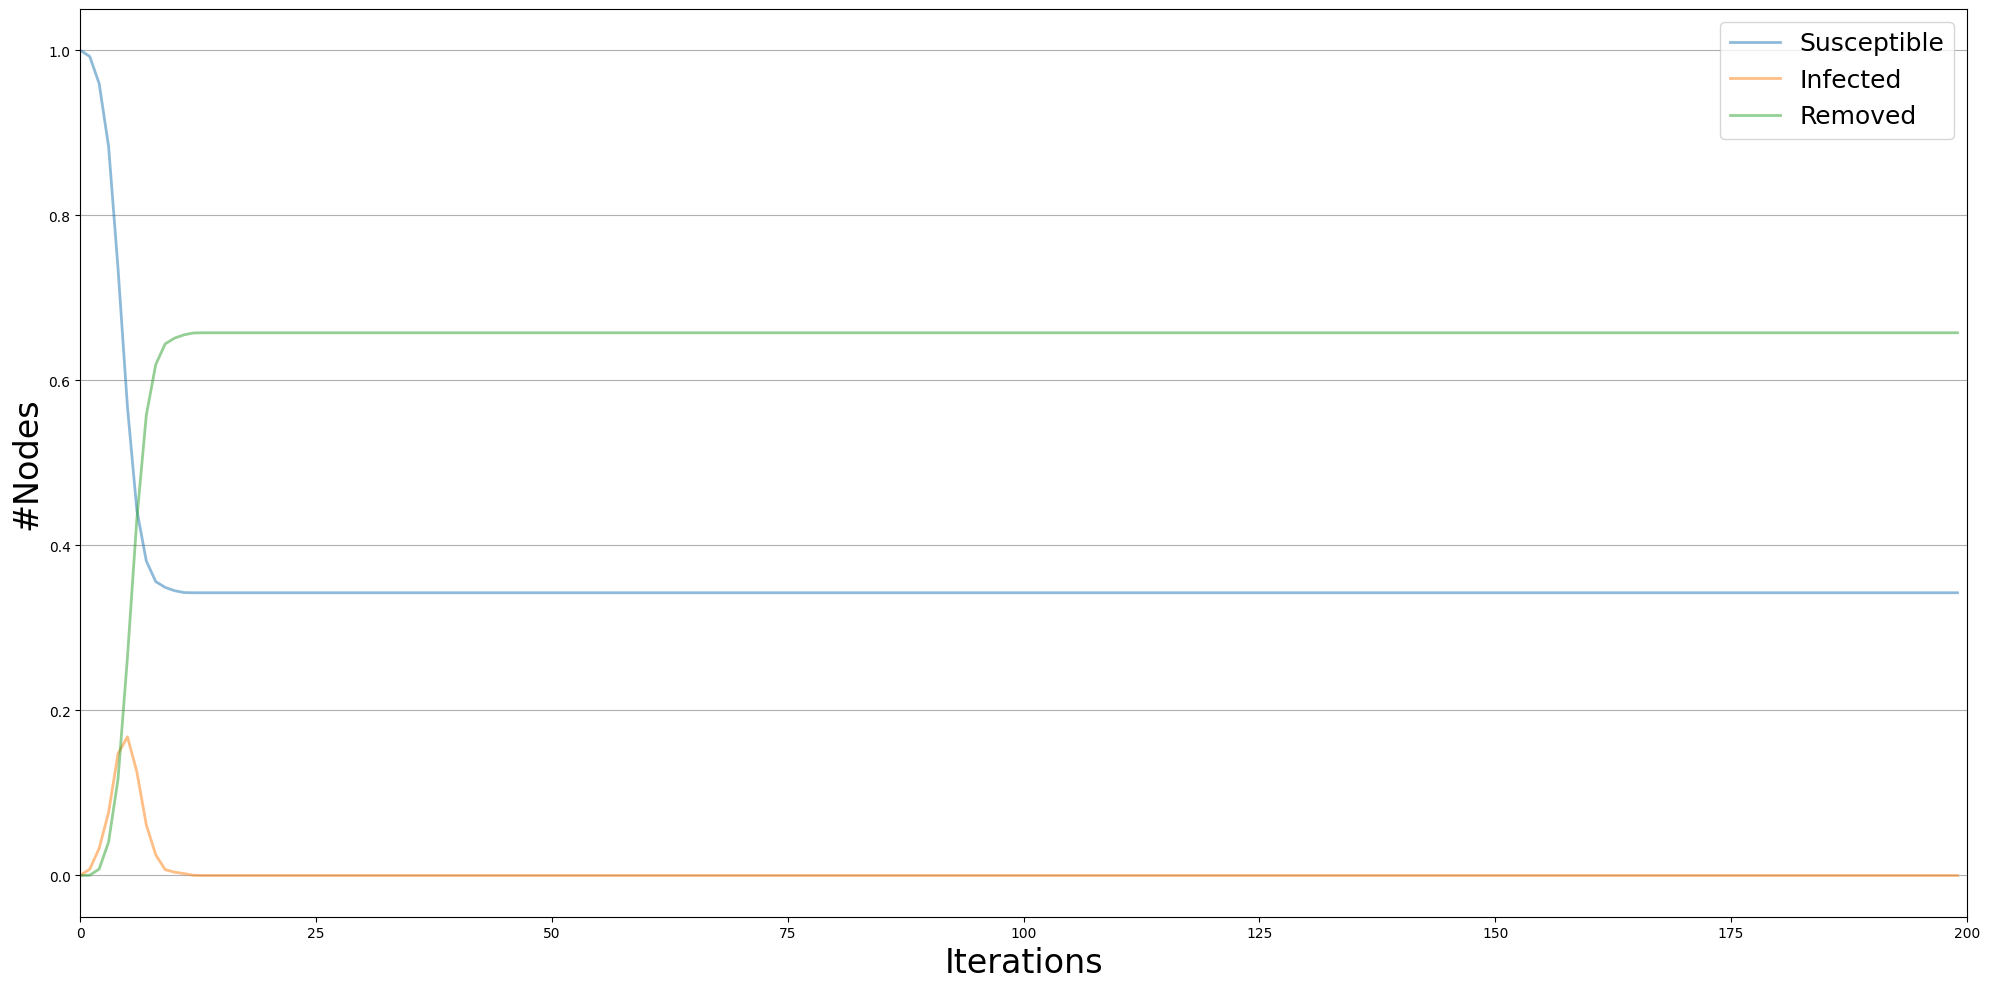

<Figure size 640x480 with 0 Axes>

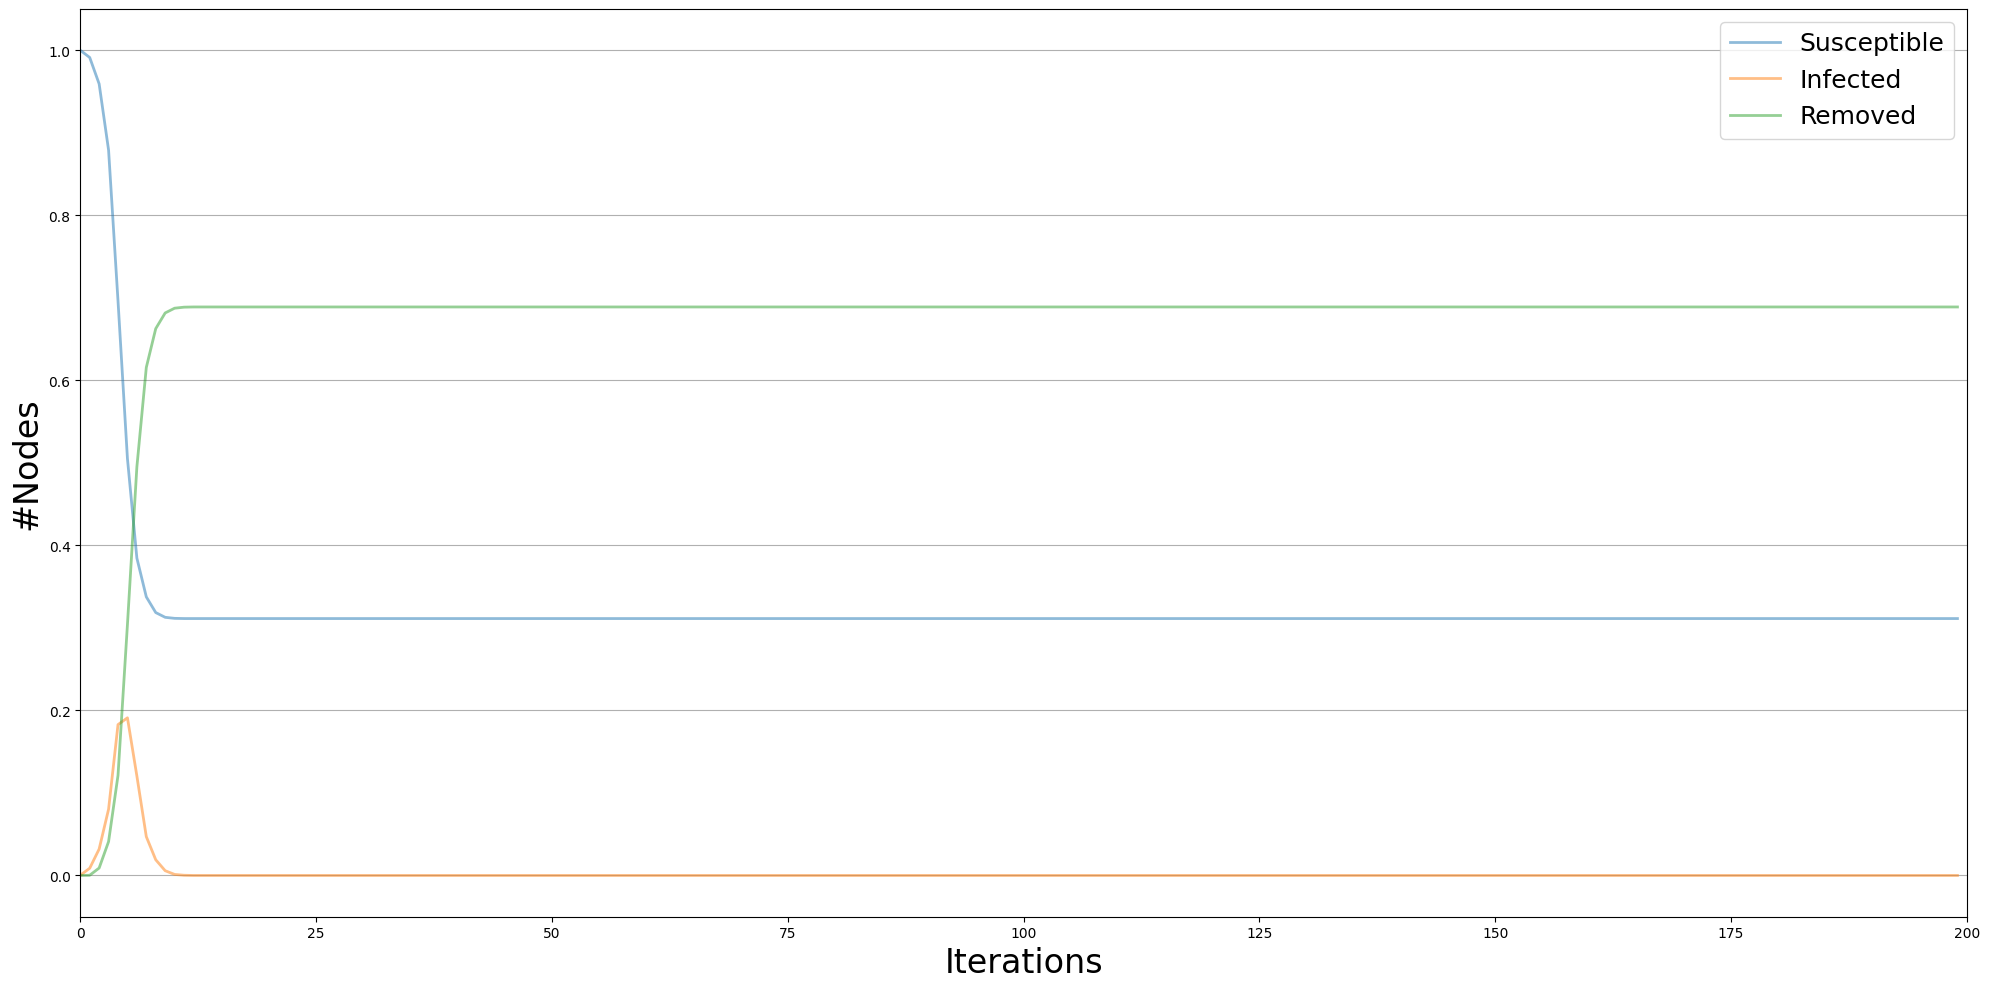

<Figure size 640x480 with 0 Axes>

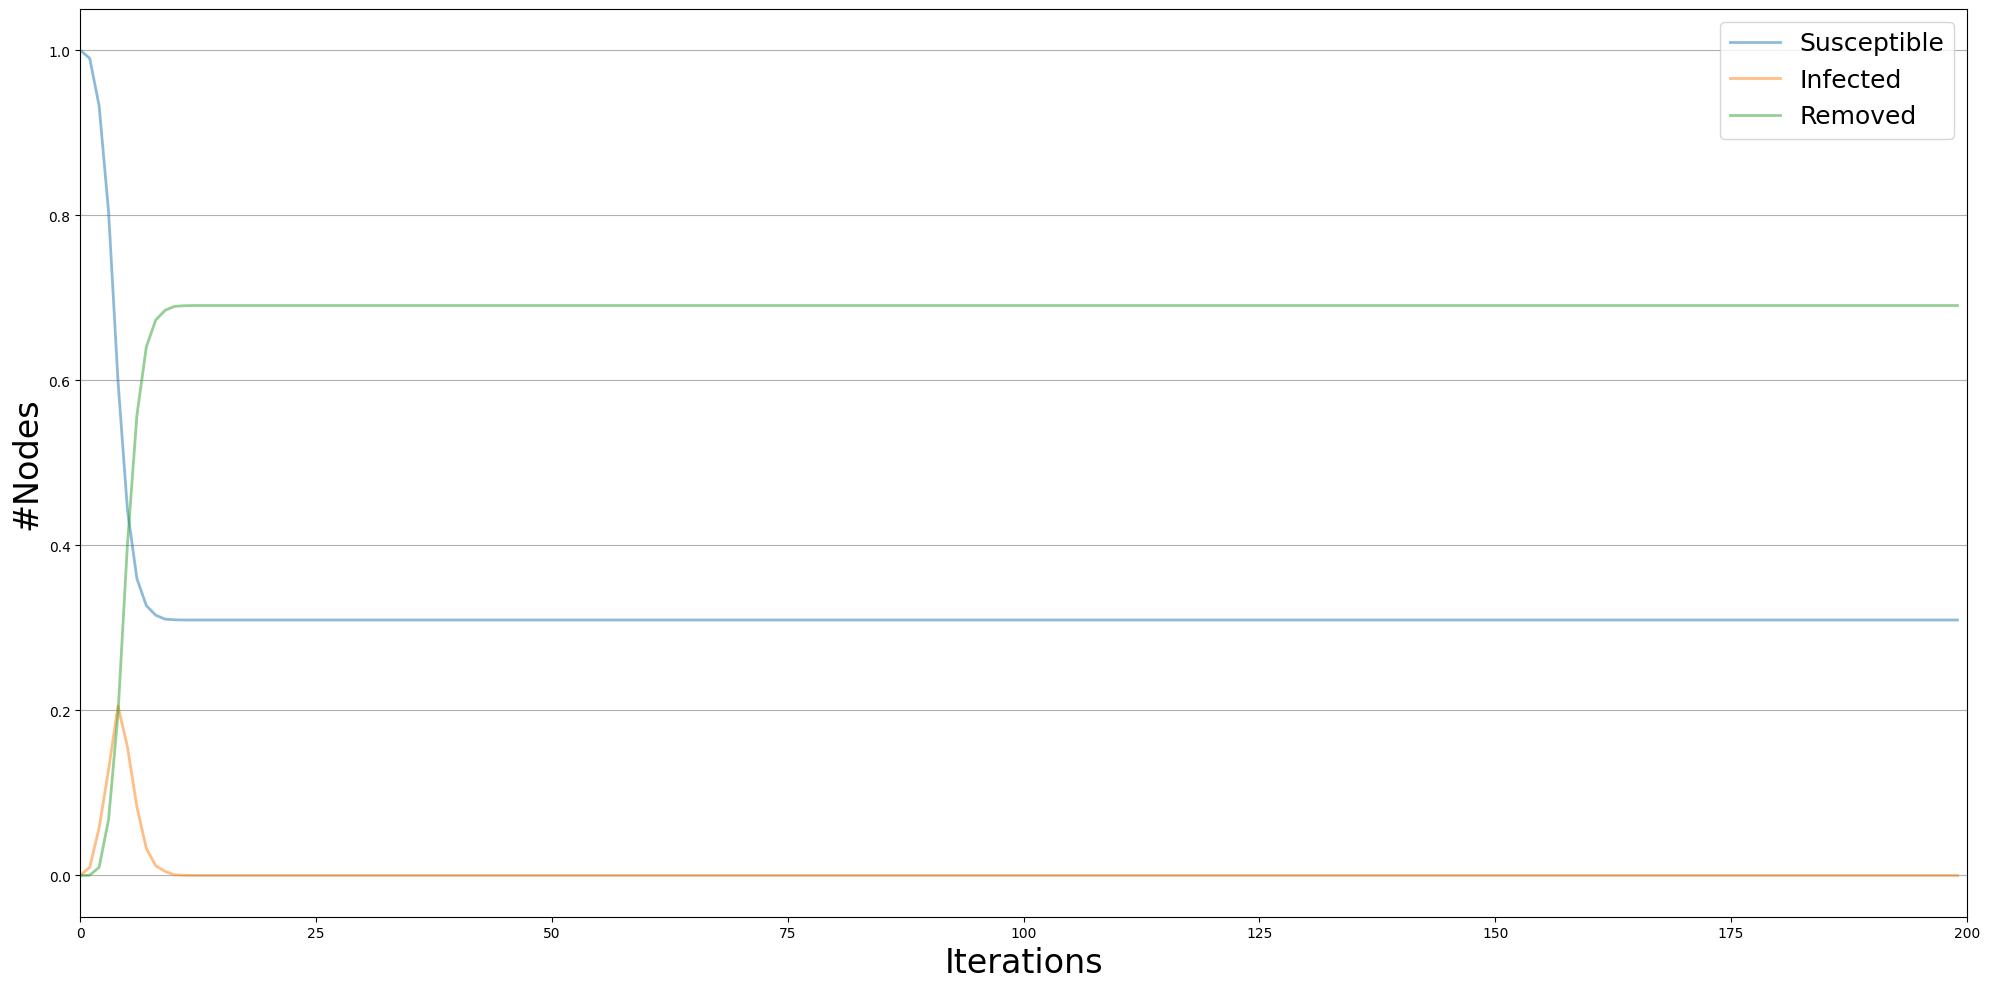

<Figure size 640x480 with 0 Axes>

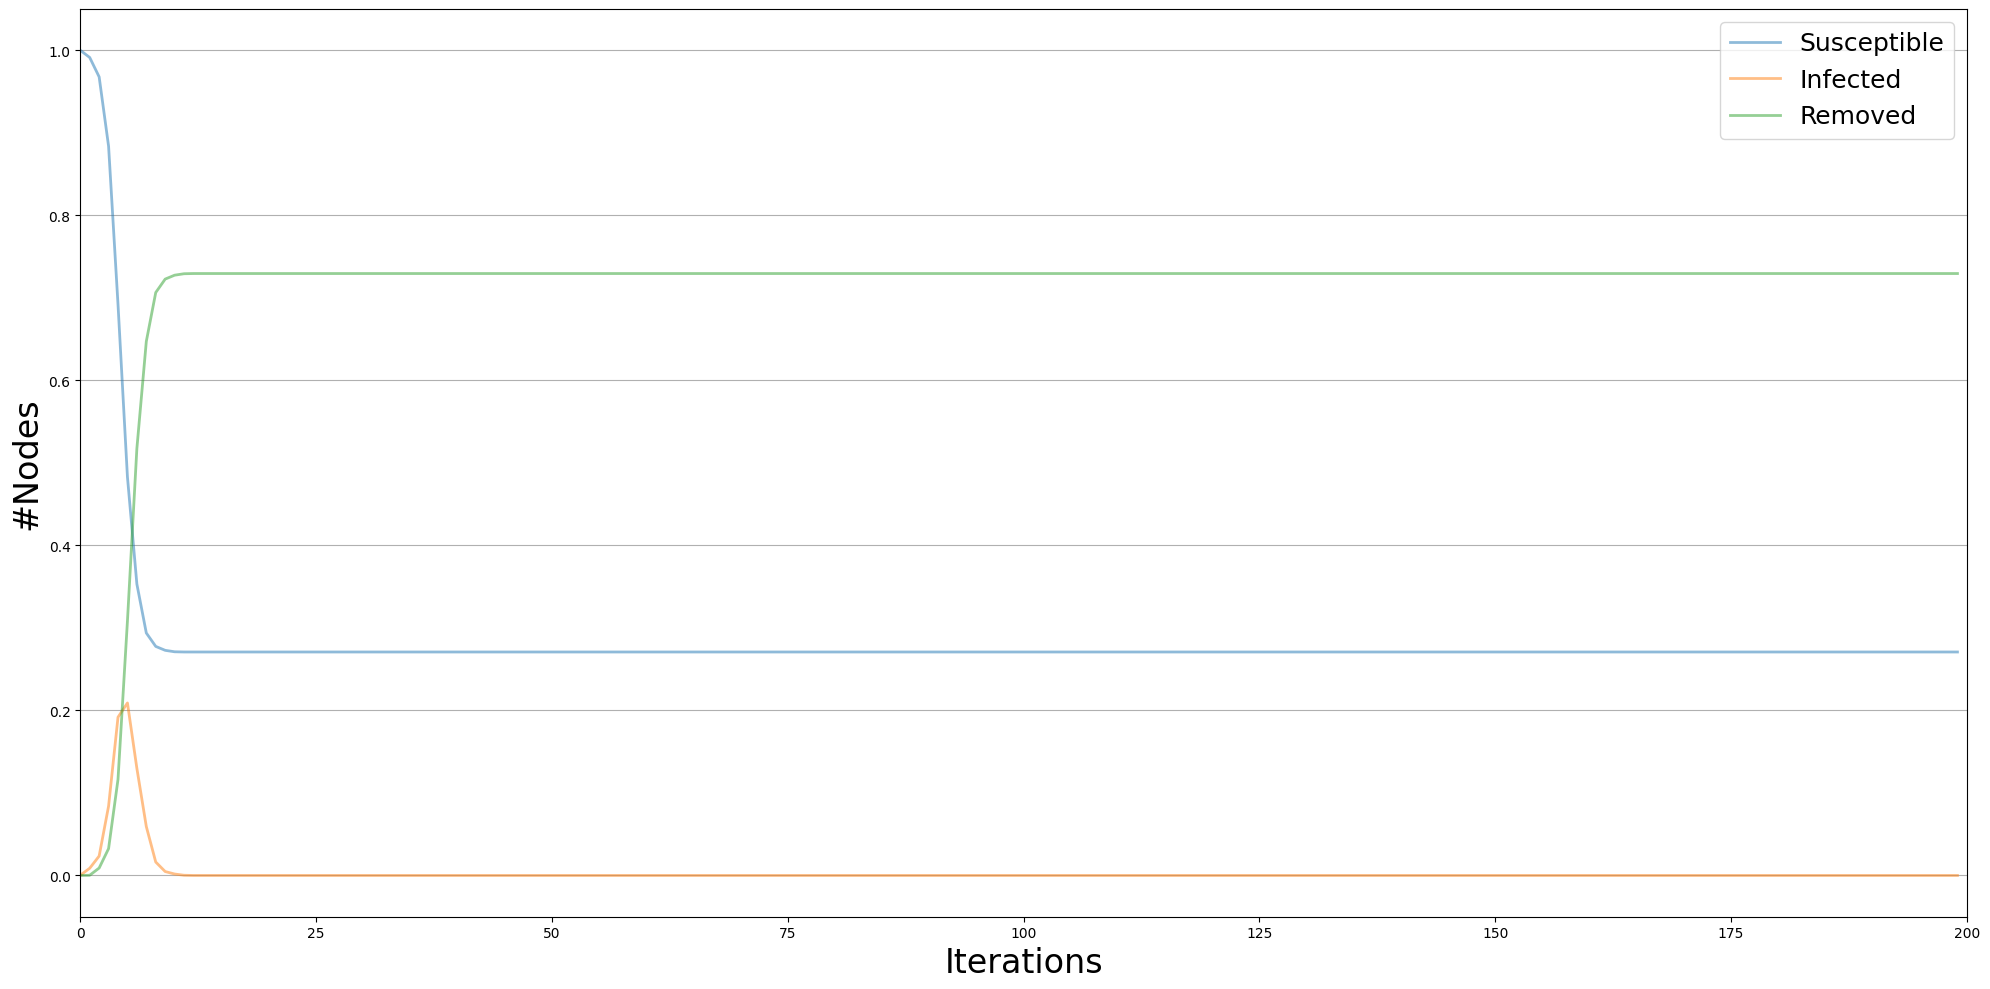

<Figure size 640x480 with 0 Axes>

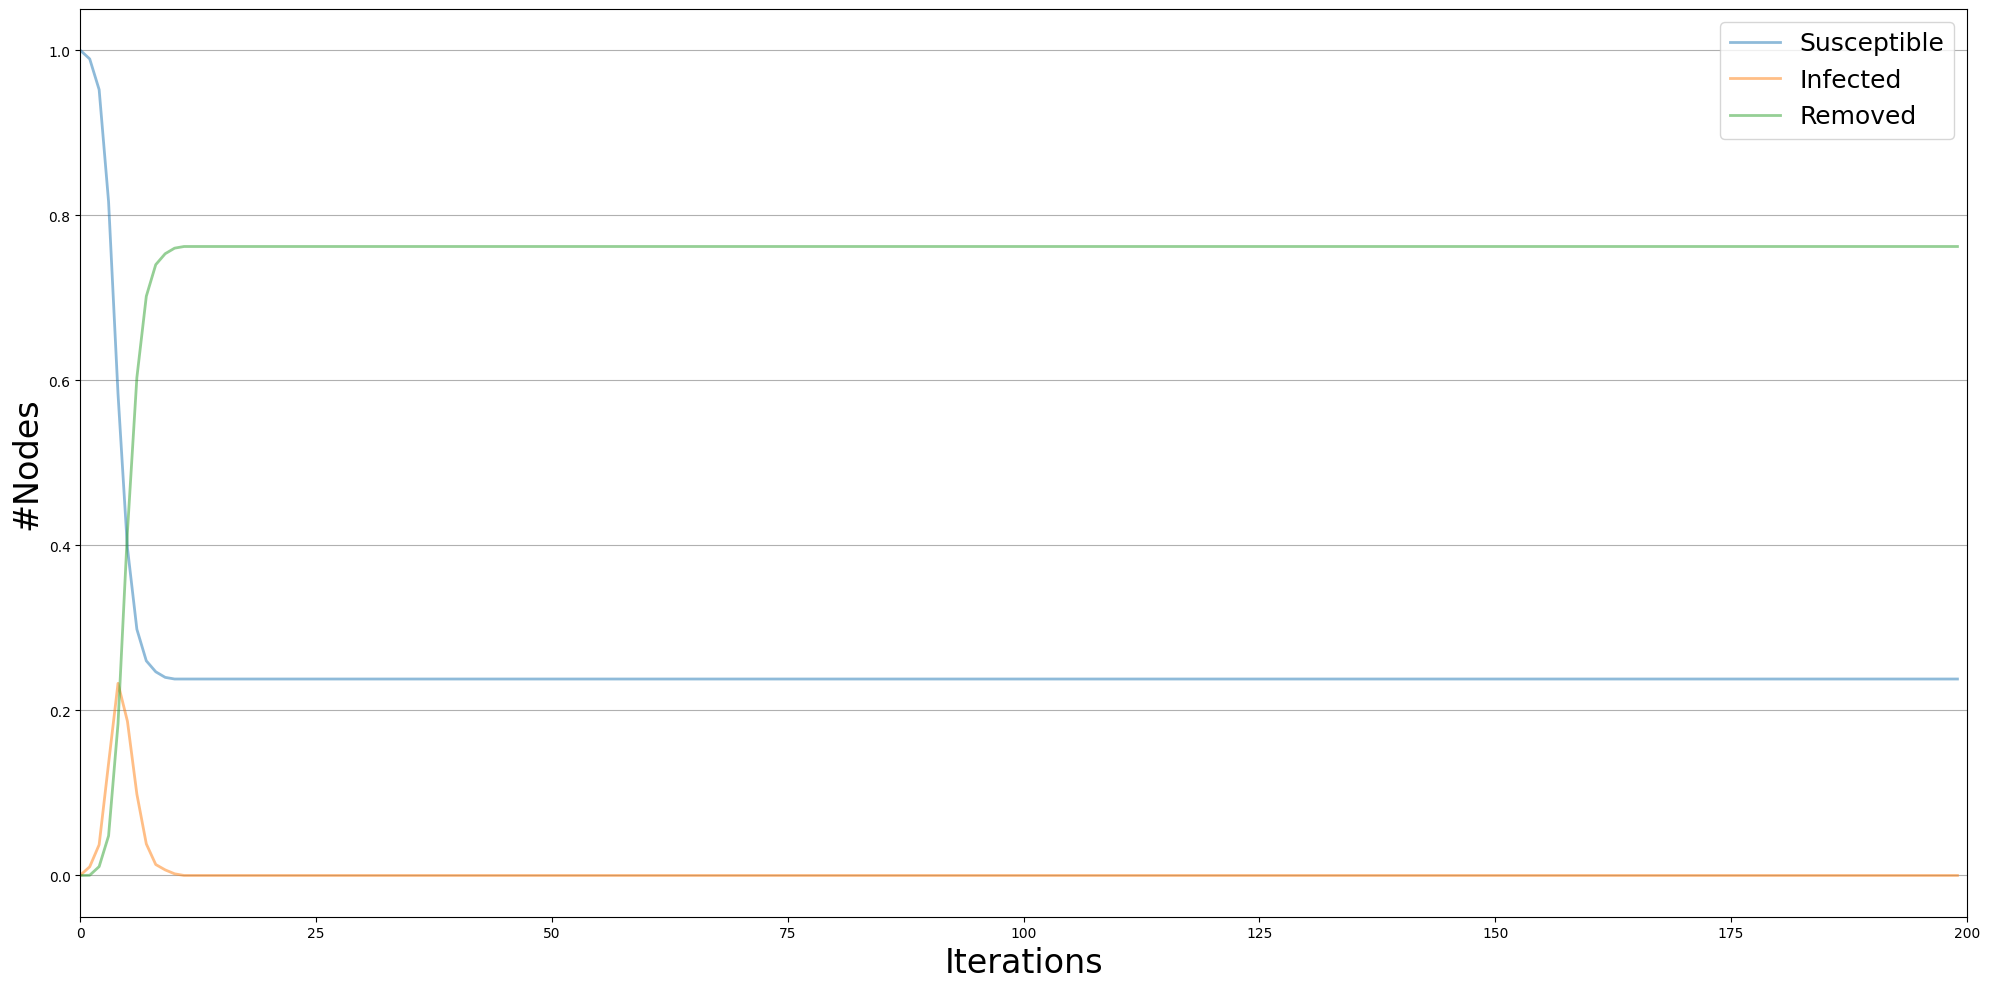

In [40]:

for B in B_values:
    recovered_sum = 0  # To store the sum of recovered nodes across all iterations
    
    # Store trends for plotting
    trends = []

    for i in range(num_iterations):
        # Initialize the SIR model
        model = ep.SIRModel(G)
        
        # Configuration setup
        config = mc.Configuration()
        config.add_model_parameter('beta', B)  # Set infection rate to current B
        config.add_model_parameter('gamma', 1.0)  # Recovery probability = 1
        config.add_model_initial_configuration("Infected", {0: 1})  # Start with node 0 infected
        
        # Set the model configuration
        model.set_initial_status(config)
        
        # Run the model until all nodes are either recovered or susceptible
        iteration = model.iteration_bunch(200)
        
        # Store trends for plotting (useful for later visualization)
        trends.append(model.build_trends(iteration))

        # Get the final state after the infection spread
        final_state = iteration[-1]['node_count']
        recovered_nodes = final_state[2]  # Index 2 represents 'Recovered' nodes
        
        recovered_sum += recovered_nodes
    
    # Calculate the affected scale for the current B
    affected_scale = recovered_sum / (num_iterations * num_nodes)
    affected_scales[round(B, 3)] = round(affected_scale, 3)

    # Plot the trend for each B
    viz = DiffusionTrend(model, trends[-1])  # Use the last iteration's trends for visualization
    
    plt.figure()  # Create a new figure for each plot
    viz.plot()  # Call the plot method of the viz object
    plt.title(f"Diffusion Trend for B={round(B, 3)}")
    
    plt.close()  # Close the plot to free memory


In [41]:

# Output the affected scales for each B
for B, scale in affected_scales.items():
    print(f"B = {B}: Affected scale = {scale}")

B = 0.111: Affected scale = 0.392
B = 0.122: Affected scale = 0.448
B = 0.134: Affected scale = 0.502
B = 0.145: Affected scale = 0.551
B = 0.156: Affected scale = 0.593
B = 0.167: Affected scale = 0.634
B = 0.178: Affected scale = 0.67
B = 0.189: Affected scale = 0.703
B = 0.2: Affected scale = 0.732
B = 0.211: Affected scale = 0.757
